In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('/chatgpt_reviews.csv',header=0)

In [8]:
df.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


In [10]:
rating_counts = df['Ratings'].value_counts().sort_index()
display(rating_counts)

,count
Ratings,
1,12083
2,3375
3,8157
4,22897
5,150215


In [16]:
df.describe()


,Ratings
count,196727.000000
mean,4.503535
std,1.083004
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [17]:
df.columns


Index(['Review Id', 'Review', 'Ratings', 'Review Date'], dtype='object')

In [18]:
df.nunique()


,0
Review Id,193154
Review,125495
Ratings,5
Review Date,192689


In [19]:
df.iloc[0:5] #instead of head


,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


In [20]:
df.isnull().sum()

,0
Review Id,0
Review,6
Ratings,0
Review Date,0


In [21]:
df.duplicated().sum()

np.int64(2511)

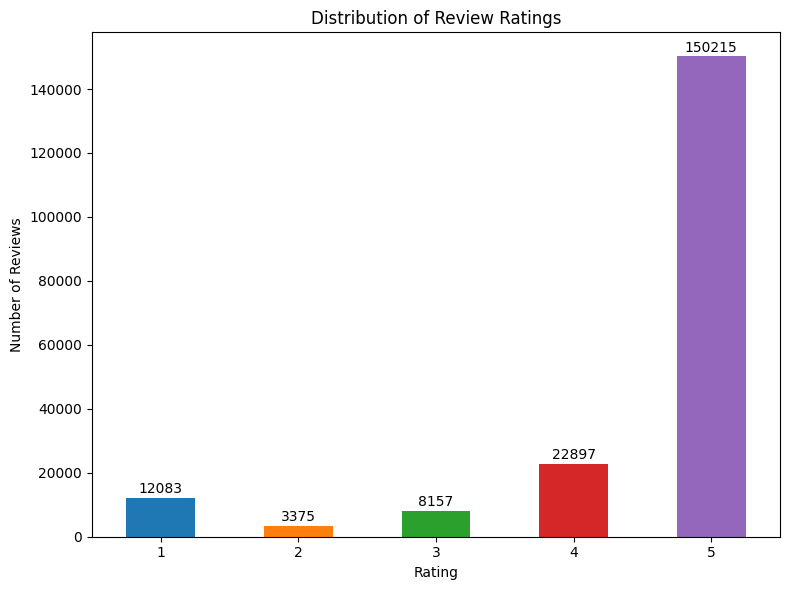

In [15]:
import matplotlib.pyplot as plt

# Define a list of distinct colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'] # Example colors (blue, orange, green, red, purple)

# Create the bar plot with different colors for each bar
plt.figure(figsize=(8, 6))
ax = rating_counts.plot(kind='bar', color=colors)

# Add data labels
for i, v in enumerate(rating_counts):
    ax.text(i, v + 500, str(v), ha='center', va='bottom') # Adjust y-offset (500) as needed for better visibility

# Add labels and title
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0) # Ensure x-axis labels are horizontal

# Display the plot
plt.tight_layout()
plt.show()

In [25]:
from textblob import TextBlob

def get_sentiment_scores(text):
    try:
        analysis = TextBlob(str(text))
        return analysis.sentiment.polarity, analysis.sentiment.subjectivity
    except:
        return 0, 0

df[['polarity', 'subjectivity']] = df['Review'].apply(lambda x: pd.Series(get_sentiment_scores(x)))

# Summary of sentiment
print('Summary of Polarity:')
display(df['polarity'].describe())

print('\nSummary of Subjectivity:')
display(df['subjectivity'].describe())

Summary of Polarity:


,polarity
count,196727.000000
mean,0.446714
std,0.376533
min,-1.000000
25%,0.100000
50%,0.500000
75%,0.700000
max,1.000000



Summary of Subjectivity:


,subjectivity
count,196727.000000
mean,0.516439
std,0.339389
min,0.000000
25%,0.300000
50%,0.600000
75%,0.780000
max,1.000000


In [26]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['polarity'].apply(categorize_sentiment)

print('\nSentiment Category Distribution:')
display(df['sentiment_category'].value_counts())


Sentiment Category Distribution:


,count
sentiment_category,
Positive,150122
Neutral,38450
Negative,8155


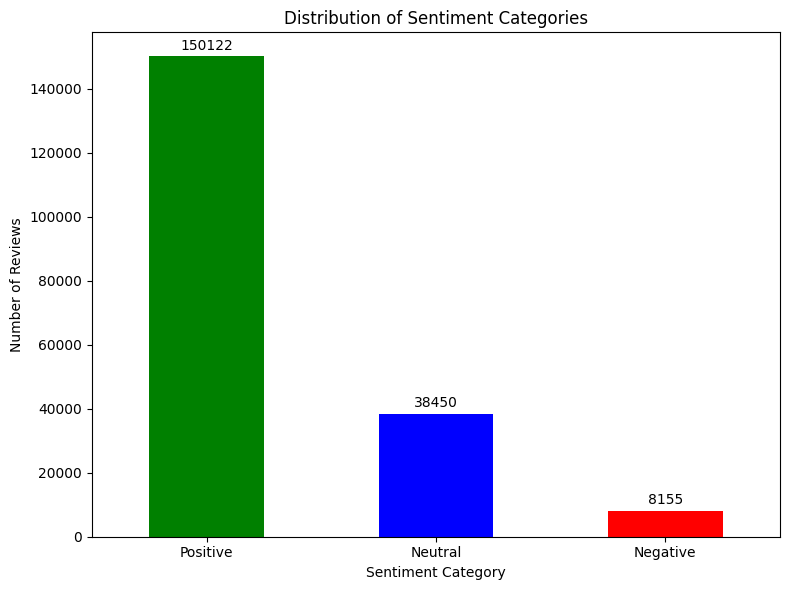

In [28]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment_category'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])

plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)

# Add data labels
for i, v in enumerate(sentiment_counts):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom') # Adjust y-offset as needed

plt.tight_layout()
plt.show()

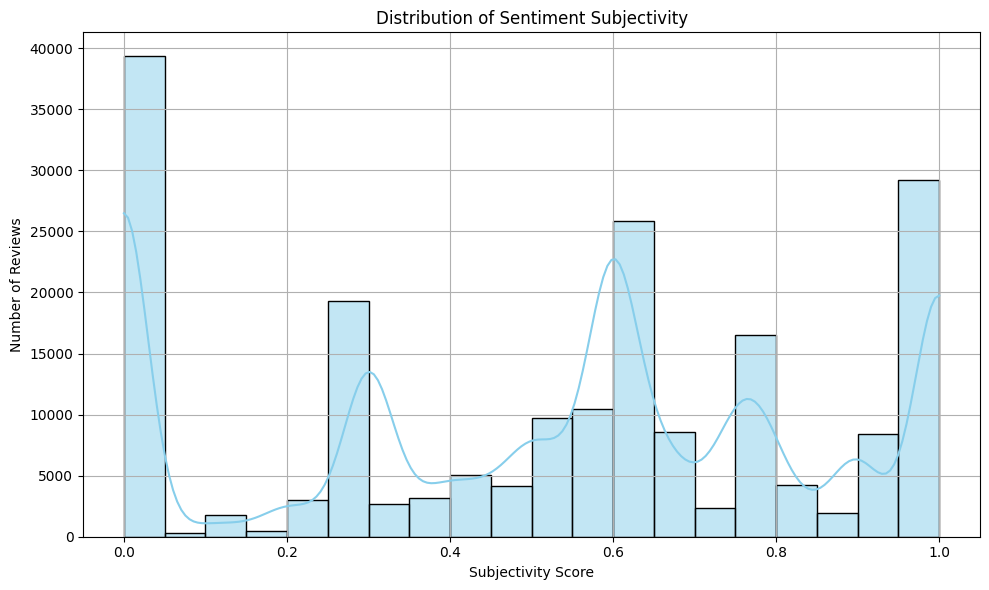

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['subjectivity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Subjectivity')
plt.xlabel('Subjectivity Score')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

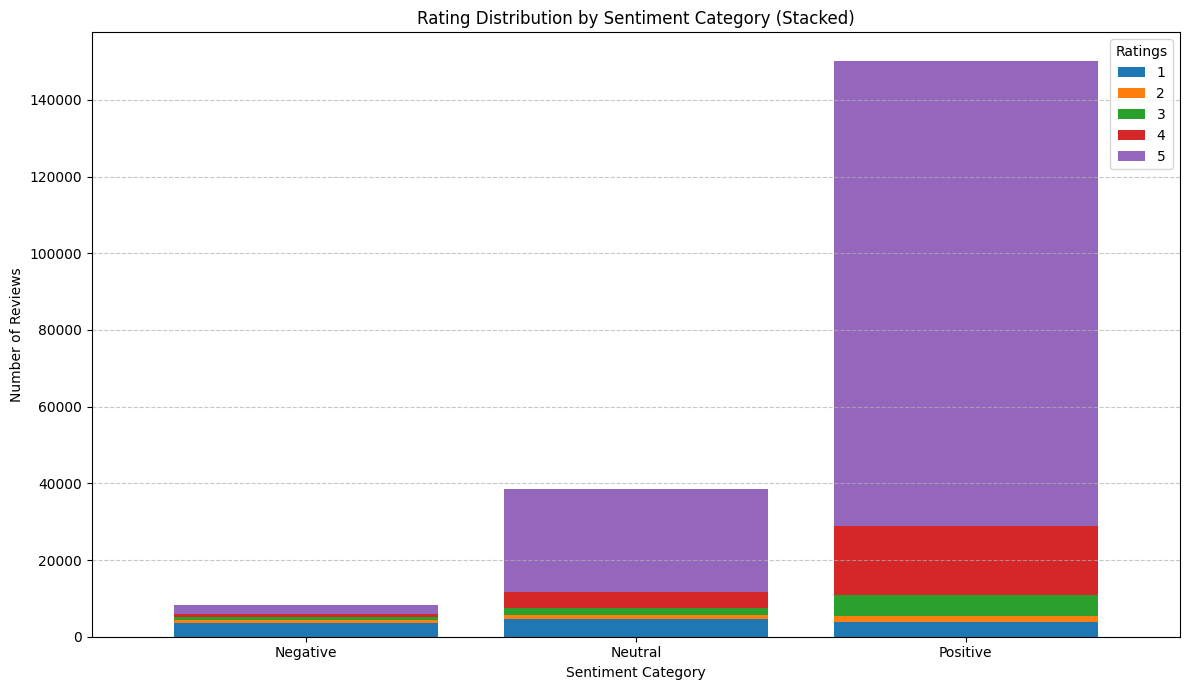

In [36]:
import matplotlib.pyplot as plt

# Group by sentiment category and ratings, then count occurrences
sentiment_rating_counts = df.groupby(['sentiment_category', 'Ratings']).size().unstack(fill_value=0)

# Plotting the stacked column chart
plt.figure(figsize=(12, 7))
sentiment_rating_counts.plot(kind='bar', stacked=True, figsize=(12, 7), width=0.8)

plt.title('Rating Distribution by Sentiment Category (Stacked)')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [37]:
import re

# Filter for positive reviews (assuming 'positive_reviews' DataFrame is already created)
# If not, it would be: positive_reviews = df[df['sentiment_category'] == 'Positive']

# Function to clean and tokenize text (re-using the one defined previously)
def clean_and_tokenize(text):
    if pd.isna(text):
        return []
    text = str(text).lower() # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text) # Remove punctuation and numbers
    words = text.split() # Tokenize into words
    return words

# Apply the function to the 'Review' column of positive reviews and flatten the list of words
positive_words = positive_reviews['Review'].apply(clean_and_tokenize).explode()

# Get the value counts of the words in positive reviews
common_positive_words = positive_words.value_counts()

print('Top 20 Most Common Words in Positive Reviews:')
display(common_positive_words.head(20))

Top 20 Most Common Words in Positive Reviews:


,count
Review,
app,44213
it,41421
good,39063
the,36782
very,35213
and,34448
i,33308
is,32766
to,30344


In [29]:
# Filter for positive reviews
positive_reviews = df[df['sentiment_category'] == 'Positive']

# Sort by polarity in descending order to get the most positive reviews
top_positive_reviews = positive_reviews.sort_values(by='polarity', ascending=False)

print('Top 5 Most Positive Reviews:')
display(top_positive_reviews[['Review', 'Ratings', 'polarity']].head(5))

Top 5 Most Positive Reviews:


,Review,Ratings,polarity
8,Very impressive,5,1.0
12,best ❤️‍🩹❤️‍🩹,5,1.0
87853,ChatGPT is a lifesaver. My very best companion...,5,1.0
87889,Great tool!! I use it every day to teach and a...,5,1.0
87895,ChatGPT is an awesome minding blowing tool. I ...,5,1.0


In [30]:
# Filter for negative reviews
negative_reviews = df[df['sentiment_category'] == 'Negative']

# Sort by polarity in ascending order to get the most negative reviews
top_negative_reviews = negative_reviews.sort_values(by='polarity', ascending=True)

print('Top 5 Most Negative Reviews:')
display(top_negative_reviews[['Review', 'Ratings', 'polarity']].head(5))

Top 5 Most Negative Reviews:


,Review,Ratings,polarity
181424,insane tech,5,-1.0
127171,Worst app ever,1,-1.0
85313,"The voice feature uses call audio, meaning mus...",2,-1.0
106586,it is the worst bot app I have ever seen 😔😔,1,-1.0
106571,Worst app I can't log in,1,-1.0


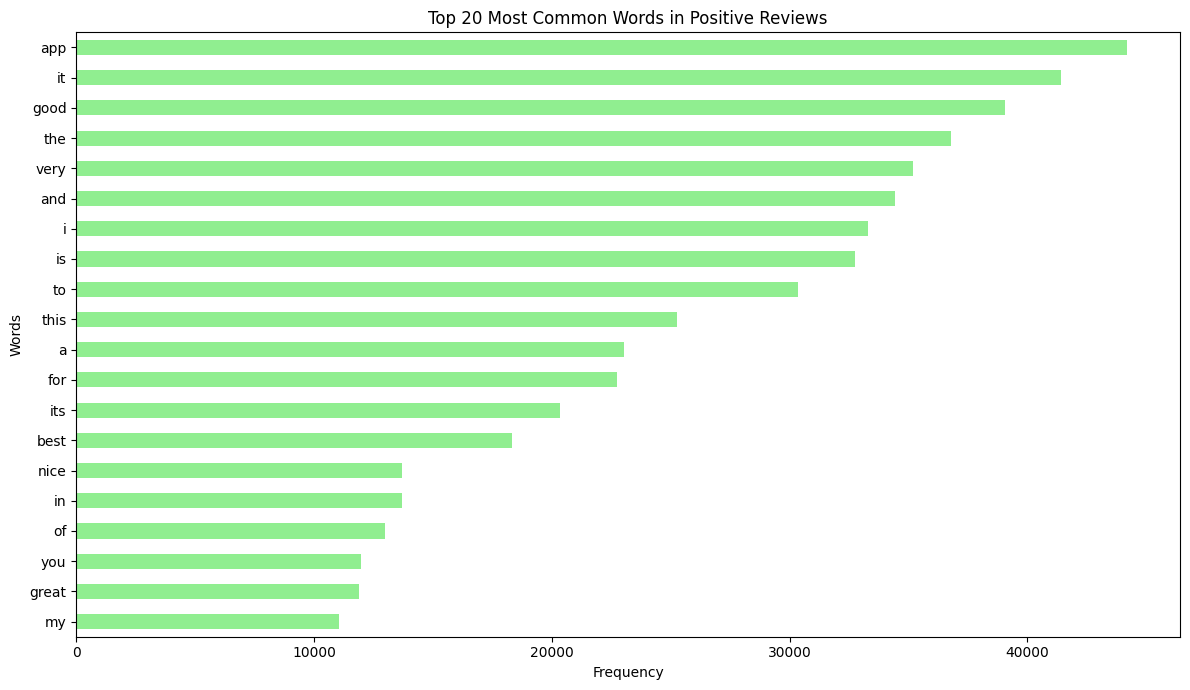

In [42]:
import matplotlib.pyplot as plt

# Get the top 20 common positive words for plotting
top_positive_words_plot = common_positive_words.head(20)

plt.figure(figsize=(12, 7))
# Change kind to 'barh' for horizontal bar chart
top_positive_words_plot.plot(kind='barh', color='lightgreen')

plt.title('Top 20 Most Common Words in Positive Reviews')
plt.xlabel('Frequency') # X-axis becomes frequency for horizontal bars
plt.ylabel('Words') # Y-axis becomes words for horizontal bars
plt.gca().invert_yaxis() # Invert y-axis to have the highest frequency word at the top
plt.tight_layout()
plt.show()

In [43]:
# Filter for negative reviews
negative_reviews = df[df['sentiment_category'] == 'Negative']

# Apply the cleaning and tokenization function to the 'Review' column of negative reviews and flatten the list of words
negative_words = negative_reviews['Review'].apply(clean_and_tokenize).explode()

# Get the value counts of the words in negative reviews
common_negative_words = negative_words.value_counts()

print('Top 20 Most Common Words in Negative Reviews:')
display(common_negative_words.head(20))

Top 20 Most Common Words in Negative Reviews:


,count
Review,
the,5092
it,4949
i,4433
to,4394
and,3504
is,3341
a,2850
app,2398
this,2323


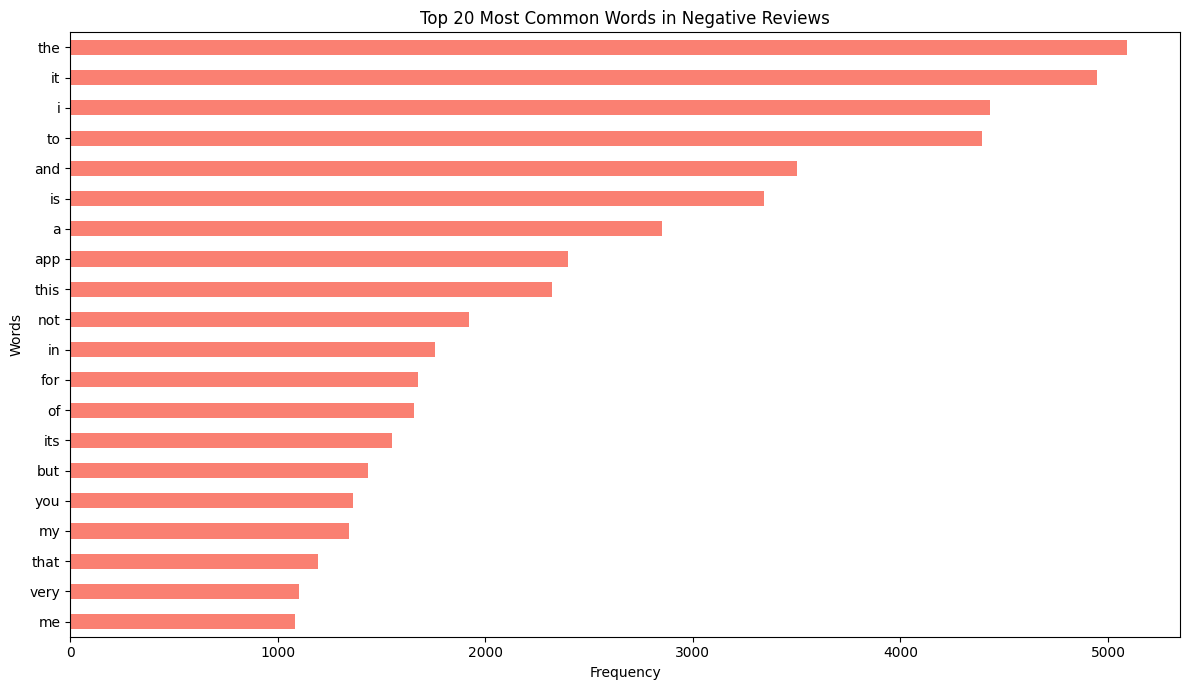

In [44]:
import matplotlib.pyplot as plt

# Get the top 20 common negative words for plotting
top_negative_words_plot = common_negative_words.head(20)

plt.figure(figsize=(12, 7))
# Create a horizontal bar chart
top_negative_words_plot.plot(kind='barh', color='salmon') # Using a different color for negative words

plt.title('Top 20 Most Common Words in Negative Reviews')
plt.xlabel('Frequency') # X-axis becomes frequency for horizontal bars
plt.ylabel('Words') # Y-axis becomes words for horizontal bars
plt.gca().invert_yaxis() # Invert y-axis to have the highest frequency word at the top
plt.tight_layout()
plt.show()

In [45]:
# Filter for neutral reviews
neutral_reviews = df[df['sentiment_category'] == 'Neutral']

print('Top 5 Neutral Reviews:')
display(neutral_reviews[['Review', 'Ratings', 'polarity', 'subjectivity']].head(5))

Top 5 Neutral Reviews:


,Review,Ratings,polarity,subjectivity
17,🫶🏻,5,0.0,0.0
22,beleza,5,0.0,0.0
24,abdul baset,5,0.0,0.0
25,2024-08-23 Call function doesn't get language ...,2,0.0,0.6
29,👍👍👍👍👍👍👍,5,0.0,0.0


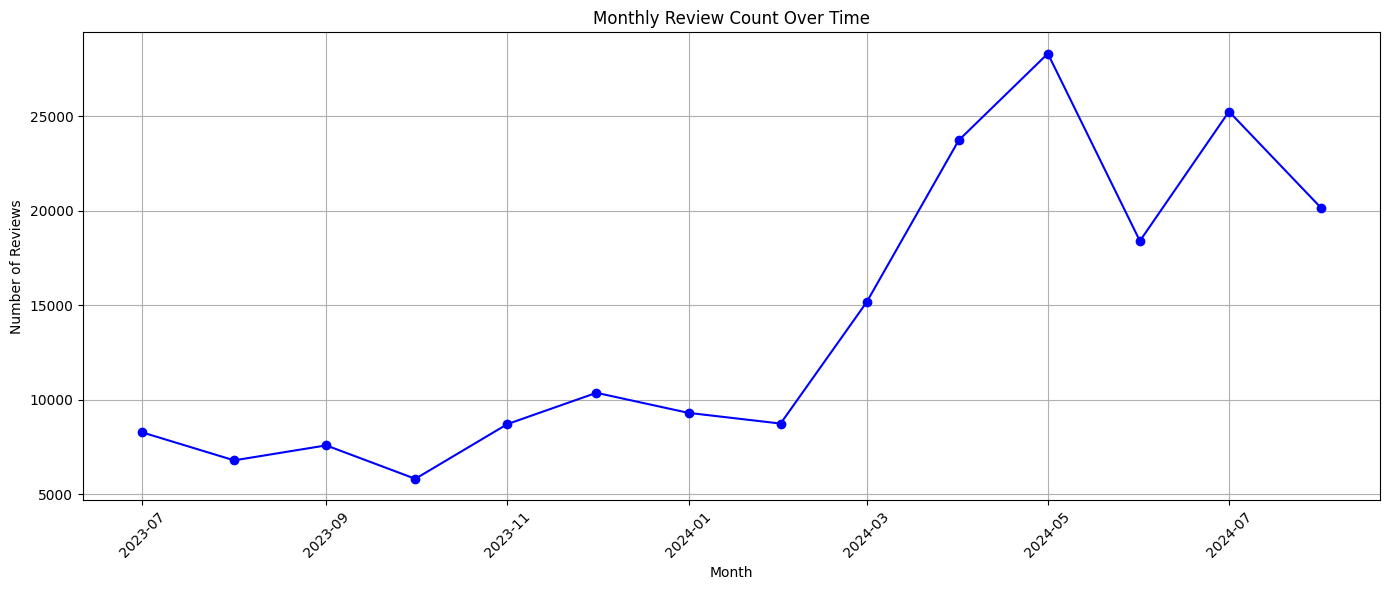

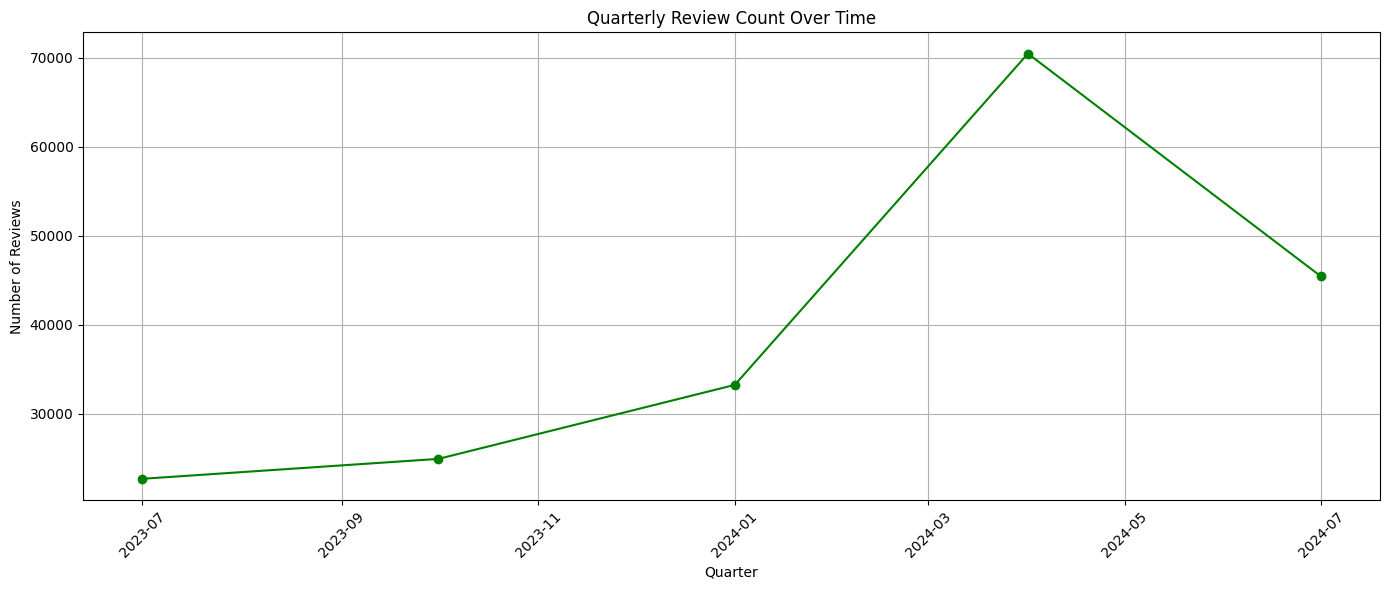

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Review Date' is in datetime format
df['Review Date'] = pd.to_datetime(df['Review Date'])

# Create 'Review Month' and 'Review Quarter' columns
df['Review Month'] = df['Review Date'].dt.to_period('M')
df['Review Quarter'] = df['Review Date'].dt.to_period('Q')

# --- Monthly Review Trend ---
monthly_reviews = df.groupby('Review Month').size().reset_index(name='Review Count')
monthly_reviews['Review Month'] = monthly_reviews['Review Month'].dt.to_timestamp() # Convert Period to Timestamp for plotting

plt.figure(figsize=(14, 6))
plt.plot(monthly_reviews['Review Month'], monthly_reviews['Review Count'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Review Count Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Quarterly Review Trend ---
quarterly_reviews = df.groupby('Review Quarter').size().reset_index(name='Review Count')
quarterly_reviews['Review Quarter'] = quarterly_reviews['Review Quarter'].dt.to_timestamp() # Convert Period to Timestamp for plotting

plt.figure(figsize=(14, 6))
plt.plot(quarterly_reviews['Review Quarter'], quarterly_reviews['Review Count'], marker='o', linestyle='-', color='green')
plt.title('Quarterly Review Count Over Time')
plt.xlabel('Quarter')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

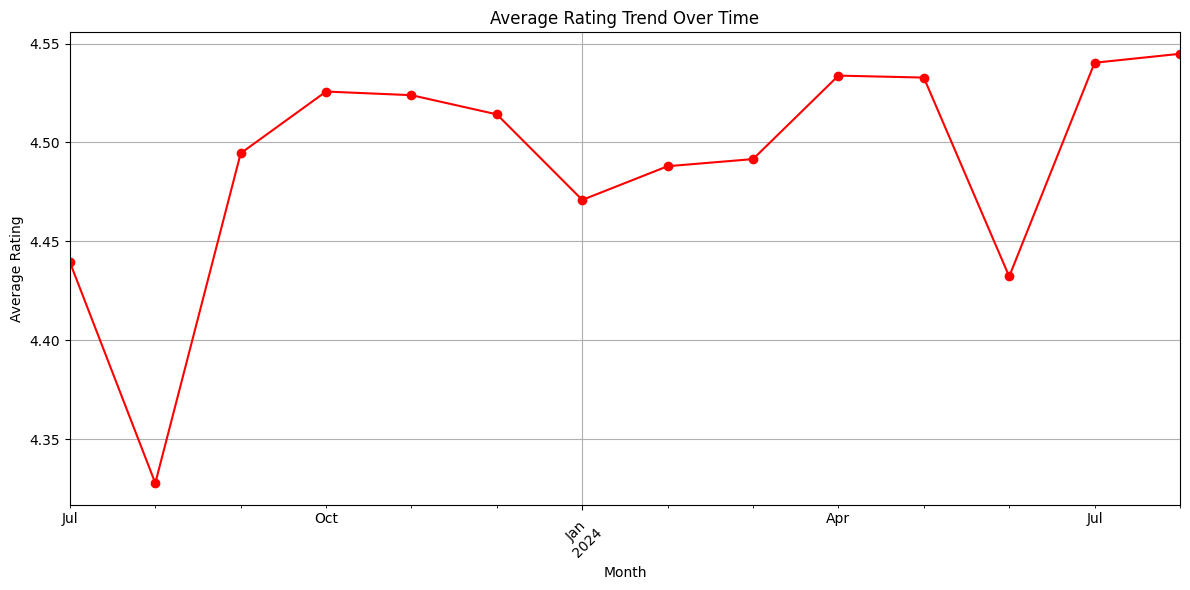

In [50]:
import matplotlib.pyplot as plt

# Ensure 'Review Date' is in datetime format
df['Review Date'] = pd.to_datetime(df['Review Date'])

# Group by month and calculate the mean rating for each month
trend = df.groupby(df['Review Date'].dt.to_period('M'))['Ratings'].mean()
trend = trend.to_timestamp() # Convert PeriodIndex to DateTimeIndex for plotting

# Plotting the trend
plt.figure(figsize=(12, 6))
trend.plot(kind='line', marker='o', linestyle='-', color='red')
plt.title('Average Rating Trend Over Time')
plt.ylabel('Average Rating')
plt.xlabel('Month')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()